# Data Analysis of Data Analysts

Project 1

In [138]:
# Dependencies and Setup
import os
import csv
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy.stats import linregress
import scipy.stats as st
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import cartopy.crs as ccrs



In [139]:
from config import acct_id
from config import api_key 

#Creation of an empty Data Frame for storage of values per State & City
city_state = {
    'City': ["Atlanta", "Austin", "San Francisco", "New York City", "San Diego", "Boston", "Portland",
            "Seattle", "Los Angeles", "Chicago", "Denver", "Dallas"],
    'State': ["GA", "TX", "CA", "NY", "CA", "MA", "OR", "WA", "CA", "IL", "CO", "TX"]}
    
dataframe_1 = pd.DataFrame(city_state)
dataframe_1[['# of Analysts - City', 'Median Salary - City','Median Salary - State', "Median Salary - National"]] = ""

dataframe_1

,City,State,# of Analysts - City,Median Salary - City,Median Salary - State,Median Salary - National
0,Atlanta,GA,,,,
1,Austin,TX,,,,
2,San Francisco,CA,,,,
3,New York City,NY,,,,
4,San Diego,CA,,,,
5,Boston,MA,,,,
6,Portland,OR,,,,
7,Seattle,WA,,,,
8,Los Angeles,CA,,,,
9,Chicago,IL,,,,


In [140]:
api_url = f'''https://api.careeronestop.org/v1/occupation/{acct_id}/Data%20Scientists/0?training=false
&interest=false&videos=false&tasks=false&dwas=false&wages=true
&alternateOnetTitles=false&projectedEmployment=false&ooh=false
&stateLMILinks=false&relatedOnetTitles=false&skills=false&knowledge=false
&ability=false&trainingPrograms=false'''

headers = {"Authorization": f"Bearer {api_key}"}
response = requests.get(api_url, headers=headers).json()
#response

print(json.dumps(response, indent=4, sort_keys=True))

{
    "AutoCorrection": "",
    "DidYouMean": "",
    "OccupationDetail": [
        {
            "AlternateTitles": null,
            "BrightOutlook": "Bright",
            "BrightOutlookCategory": "Rapid Growth",
            "COSVideoURL": "https://www.careeronestop.org/Videos/careeronestop-videos.aspx?videocode=15205100&op=y",
            "Green": "No",
            "Location": "US",
            "OnetCode": "15-2051.00",
            "OnetDescription": "Develop and implement a set of techniques or analytics applications to transform raw data into meaningful information using data-oriented programming languages and visualization software. Apply data mining, data modeling, natural language processing, and machine learning to extract and analyze information from large structured and unstructured datasets. Visualize, interpret, and report data findings. May create dynamic data reports.",
            "OnetTitle": "Data Scientists",
            "RelatedOnetTitles": null,
            "SocInf

In [141]:
# Use the city API request but alter the city and state based on the dataframe
# This allows us to search national, state, and city data all from the same call

base_url = city_url = f"https://api.careeronestop.org/v1/occupation/{acct_id}/Data%20Scientists/"
params = "?training=false&interest=true&videos=false&tasks=false&dwas=false&wages=true&alternateOnetTitles=false&projectedEmployment=true&ooh=false&stateLMILinks=false&relatedOnetTitles=false&skills=false&knowledge=false&ability=false&trainingPrograms=false"
headers = {"Authorization": f"Bearer {api_key}"}

In [142]:
response["OccupationDetail"][0]["Wages"]["NationalWagesList"][0]["Median"]

'103500'

In [146]:
for index, row in dataframe_1.iterrows():
    # Get the city and state
    city = dataframe_1.loc[index, "City"]
    state = dataframe_1.loc[index, "State"]
    # Add the current City type to the parameters
    api_url =  f"{base_url}{city}%2C%20{state}{params}"
    
    response_1 = requests.get(api_url, headers = headers).json()
    results = response_1['OccupationDetail'][0]['Wages']['BLSAreaWagesList']
    results_state = response_1['OccupationDetail'][0]['Wages']['StateWagesList']
    results_national = response_1["OccupationDetail"][0]["Wages"]["NationalWagesList"]
    
#     results_2 = response["OccupationDetail"][0]['Projections']['Projections'][0]['ProjectedEmployment']

    try:
        #Projected Jobs
        projected_jobs = response_1["OccupationDetail"][0]['Projections']['Projections'][0]['EstimatedEmployment']
        dataframe_1.loc[index, '# of Analysts - City'] = projected_jobs
        
        #Median Salart National add
        median_salary_national = [x['Median'] for x in results if x['RateType']=='Annual' ][0] 
        dataframe_1.loc[index, 'Median Salary - National'] = median_salary_national
     
        
#       help from tutor Median Salart for city
        median_salary = [x['Median'] for x in results if x['RateType']=='Annual' ][0] 
        dataframe_1.loc[index, 'Median Salary - City'] = median_salary

        #Median Salary for State
        median_salary_state = [x['Median'] for x in results_state if x['RateType']=='Annual' ][0] 
        dataframe_1.loc[index, 'Median Salary - State'] = median_salary_state 
        
                #Median Salart National add
        median_salary_national = [x['Median'] for x in results_national if x['RateType']=='Annual' ][0] 
        dataframe_1.loc[index, 'Median Salary - National'] = median_salary_national
        
    except (KeyError, IndexError):
        dataframe_1.loc[index, 'Median Salary - City'] = "Didnt find anything"
        dataframe_1.loc[index, '# of Analysts - City'] = "Didnt find anything"
        dataframe_1.loc[index, 'Median Salaty - State'] = "Didnt find anything"
        

dataframe_1

,City,State,# of Analysts - City,Median Salary - City,Median Salary - State,Median Salary - National
0,Atlanta,GA,"2,250",104060,100400,103500
1,Austin,TX,"4,110",105350,99350,103500
2,San Francisco,CA,"18,400",137680,126810,103500
3,New York City,NY,"3,500",130070,124030,103500
4,San Diego,CA,"18,400",123570,126810,103500
5,Boston,MA,"2,880",106670,106070,103500
6,Portland,OR,760,108130,102530,103500
7,Seattle,WA,"2,700",140560,135850,103500
8,Los Angeles,CA,"18,400",103430,126810,103500
9,Chicago,IL,"3,370",104370,103730,103500


In [192]:
#Formatting into Dollars and Alhpabetize
formatted_df = dataframe_1.copy()
formatted_df = formatted_df.sort_values(by='City', ascending=True)
formatted_df['Median Salary - City'] = formatted_df['Median Salary - City'].astype(int)
formatted_df['Median Salary - State'] = formatted_df['Median Salary - State'].astype(int)
formatted_df['Median Salary - National'] = formatted_df['Median Salary - National'].astype(int)

#formatted_df['Median Salary - State'] = formatted_df['Median Salary - State'].map('${:,.2f}'.format)
#formatted_df.reset_index (drop=True)
highest_df = formatted_df.sort_values('Median Salary - State', ascending=False)
highest_df

,City,State,# of Analysts - City,Median Salary - City,Median Salary - State,Median Salary - National
7,Seattle,WA,"2,700",140560,135850,103500
8,Los Angeles,CA,"18,400",103430,126810,103500
4,San Diego,CA,"18,400",123570,126810,103500
2,San Francisco,CA,"18,400",137680,126810,103500
3,New York City,NY,"3,500",130070,124030,103500
5,Boston,MA,"2,880",106670,106070,103500
9,Chicago,IL,"3,370",104370,103730,103500
10,Denver,CO,740,103800,103200,103500
6,Portland,OR,760,108130,102530,103500
0,Atlanta,GA,"2,250",104060,100400,103500


In [193]:
city_data =[]

city_response = requests.get(api_url, headers=headers).json()

city_median = city_response["OccupationDetail"][0]["Wages"]["BLSAreaWagesList"][1]["Median"]
city_median
# for index, row in df.iterrows():
#     # Extract necessary data from the row
#     param_value = row['BLSAreaWagesList']
    
#     # Define parameters for the API call
#     params = {'Median': param_value}

#city_response["OccupationDetail"][0]["Wages"]["BLSAreaWagesList"][0]["Median"]
#city_response

'103330'

In [194]:
highest_df


,City,State,# of Analysts - City,Median Salary - City,Median Salary - State,Median Salary - National
7,Seattle,WA,"2,700",140560,135850,103500
8,Los Angeles,CA,"18,400",103430,126810,103500
4,San Diego,CA,"18,400",123570,126810,103500
2,San Francisco,CA,"18,400",137680,126810,103500
3,New York City,NY,"3,500",130070,124030,103500
5,Boston,MA,"2,880",106670,106070,103500
9,Chicago,IL,"3,370",104370,103730,103500
10,Denver,CO,740,103800,103200,103500
6,Portland,OR,760,108130,102530,103500
0,Atlanta,GA,"2,250",104060,100400,103500


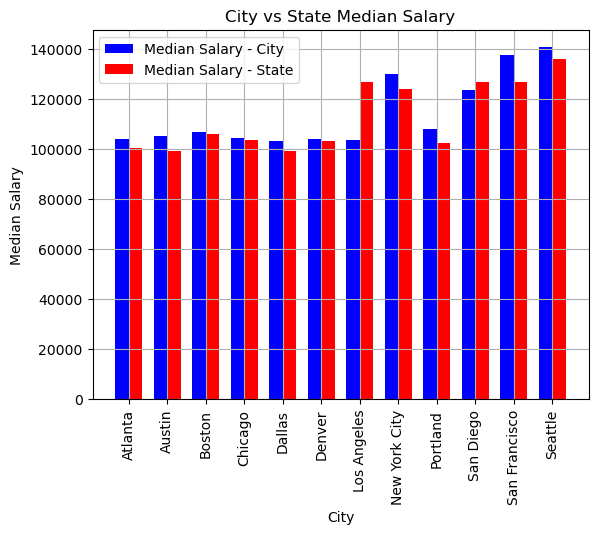

<Figure size 640x480 with 0 Axes>

In [200]:
x_value = formatted_df["City"]
y_value1 = formatted_df["Median Salary - City"]
y_value2 = formatted_df["Median Salary - State"]

# Set the positions of the bars on the x-axis
bar_positions1 = range(len(x_value))
bar_positions2 = [pos + bar_width for pos in bar_positions1]

# Plotting the bars
plt.bar(bar_positions1, y_value1, width=0.35, label='Median Salary - City', color='b')
plt.bar(bar_positions2, y_value2, width=0.35, label='Median Salary - State', color='r')

# Adding labels and title
plt.xlabel('City')
plt.ylabel('Median Salary')
plt.title('City vs State Median Salary')
plt.xticks([pos + bar_width / 2 for pos in bar_positions1], x_value, rotation=90)
plt.legend()

# Show the plot
plt.grid()
plt.show()
plt.tight_layout()

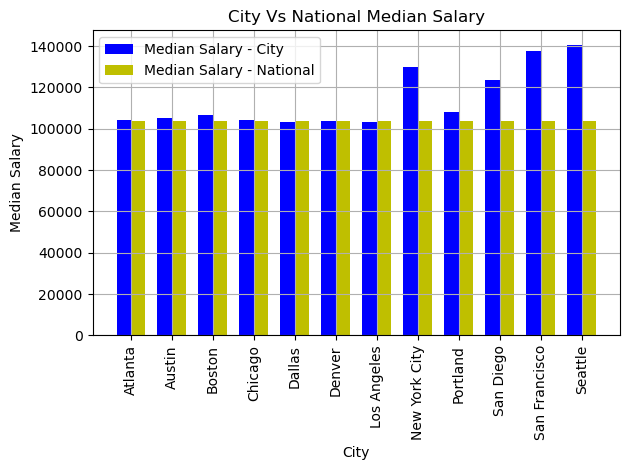

In [201]:
x_value = formatted_df["City"]
y_value1 = formatted_df["Median Salary - City"]
y_value2 = formatted_df["Median Salary - National"]

# Set the positions of the bars on the x-axis
bar_positions1 = range(len(x_value))
#bar_positions2 = [pos + bar_width for pos in bar_positions1]

# Plotting the bars
plt.bar(bar_positions1, y_value1, width=0.35, label='Median Salary - City', color='b')
plt.bar(bar_positions2, y_value2, width=0.35, label='Median Salary - National', color='y')

# Adding labels and title
plt.xlabel('City')
plt.ylabel('Median Salary')
plt.title('City Vs National Median Salary')
plt.xticks([pos + bar_width / 2 for pos in bar_positions1], x_value, rotation=90)
plt.legend()

# Show the plot
plt.grid()
plt.tight_layout()

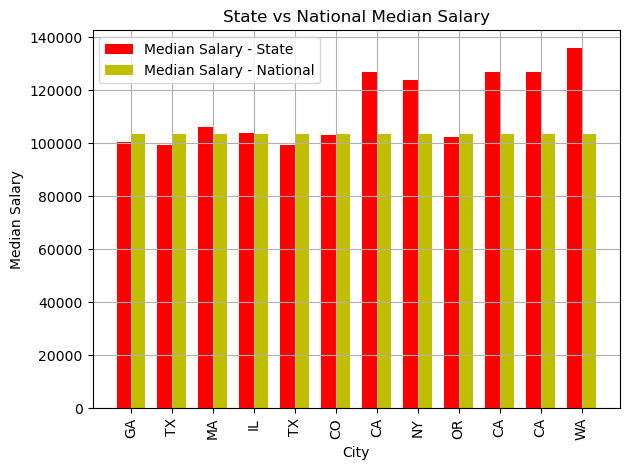

In [202]:
x_value = formatted_df["State"]
y_value1 = formatted_df["Median Salary - State"]
y_value2 = formatted_df["Median Salary - National"]

# Set the positions of the bars on the x-axis
bar_positions1 = range(len(x_value))
bar_positions2 = [pos + bar_width for pos in bar_positions1]

# Plotting the bars
plt.bar(bar_positions1, y_value1, width=0.35, label='Median Salary - State', color='r')
plt.bar(bar_positions2, y_value2, width=0.35, label='Median Salary - National', color='y')

# Adding labels and title
plt.xlabel('City')
plt.ylabel('Median Salary')
plt.title('State vs National Median Salary')
plt.xticks([pos + bar_width / 2 for pos in bar_positions1], x_value, rotation=90)
plt.legend()

# Show the plot
plt.grid()
plt.tight_layout()